In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [3]:
df = pd.read_csv("players_15.csv")

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# K-Means Clustering

In [8]:
model = KMeans(n_clusters=5)
points = df[["age","height_cm"]]

In [9]:
model.fit(points)
labels = model.labels_
print(labels)

[1 3 2 ... 4 0 2]


In [11]:
dfKmeans = pd.DataFrame({'labels': labels, 'Umur': df.age})
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["Umur"])
print(ct)

Umur    16   17   18   19   20   21   22   23   24   25  ...  35  36  37  38  \
labels                                                   ...                   
0       13  166  429  560  591  586  593  555  541  426  ...   0   0   0   0   
1       12   89  208  263  352  321  316  324  277  243  ...   0   0   0   0   
2        0    0    0    0    0    0    0    0    0  140  ...  56  28  17  12   
3        0    0    0    0    0    0    0    0    0    0  ...  88  60  30  18   
4        4   36  101  167  228  289  299  316  296  337  ...   0   0   0   0   

Umur    39  40  41  42  43  44  
labels                          
0        0   0   0   0   0   0  
1        0   0   0   0   0   0  
2        3   2   4   0   0   0  
3        6   5   2   4   1   4  
4        0   0   0   0   0   0  

[5 rows x 29 columns]


In [13]:
xs = points.iloc[:,1]
ys = points.iloc[:,0]

In [14]:
centroids = model.cluster_centers_

centroids_x = centroids[:,1]
centroids_y = centroids[:,0]

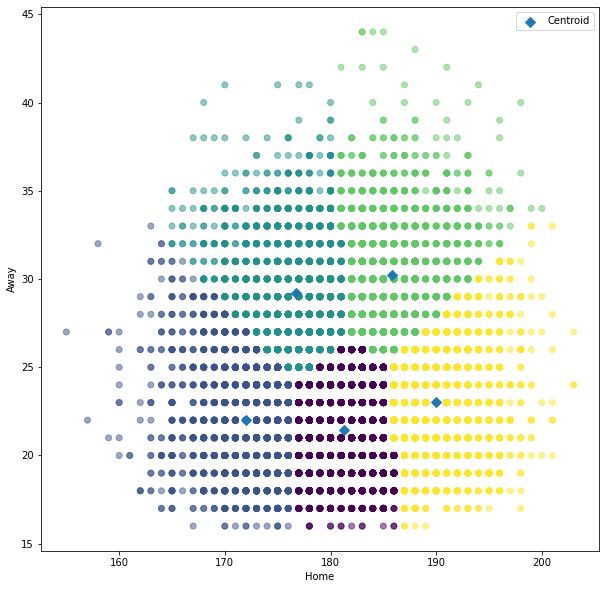

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("Home")
plt.ylabel("Away")
plt.legend()
plt.show()